<a href="https://colab.research.google.com/github/sairahulkhanapuram/project-stml/blob/main/stml_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
d = pd.read_csv('/content/all_currencies.csv')
print (d)

       Unnamed: 0        Date Symbol      Open      High       Low     Close  \
0               0  2015-11-12    $$$  0.000013  0.000017  0.000013  0.000017   
1               1  2015-11-13    $$$  0.000017  0.000033  0.000016  0.000024   
2               2  2015-11-14    $$$  0.000024  0.000053  0.000023  0.000030   
3               3  2015-11-15    $$$  0.000030  0.000063  0.000022  0.000035   
4               4  2015-11-16    $$$  0.000035  0.000046  0.000032  0.000036   
...           ...         ...    ...       ...       ...       ...       ...   
32654         563  2018-04-15   ARDR  0.298726  0.323974  0.296470  0.319736   
32655         564  2018-04-16   ARDR  0.320712  0.323597  0.296261  0.312442   
32656         565  2018-04-17   ARDR  0.313248  0.339362  0.307747  0.330463   
32657         566  2018-04-18   ARDR  0.330909  0.362038  0.330837  0.360313   
32658         567  2018-04-19   ARDR  0.359497  0.394630       NaN       NaN   

          Volume   Market Cap  
0      

In [ ]:
d.isnull()

,Unnamed: 0,Date,Symbol,Open,High,Low,Close,Volume,Market Cap
0,False,False,False,False,False,False,False,False,True
1,False,False,False,False,False,False,False,False,True
2,False,False,False,False,False,False,False,False,True
3,False,False,False,False,False,False,False,False,True
4,False,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...
32654,False,False,False,False,False,False,False,False,False
32655,False,False,False,False,False,False,False,False,False
32656,False,False,False,False,False,False,False,False,False
32657,False,False,False,False,False,False,False,False,False


In [ ]:
d = d.dropna(subset=['Market Cap'])
d

,Unnamed: 0,Date,Symbol,Open,High,Low,Close,Volume,Market Cap
29,29,2015-12-11,$$$,0.000050,0.000050,0.000022,0.000027,1.0,2287.0
30,30,2015-12-12,$$$,0.000027,0.000044,0.000021,0.000043,0.0,1245.0
31,31,2015-12-13,$$$,0.000043,0.000044,0.000022,0.000022,2.0,1996.0
32,32,2015-12-14,$$$,0.000022,0.000022,0.000022,0.000022,3.0,994.0
33,33,2015-12-15,$$$,0.000022,0.000023,0.000022,0.000023,2.0,1018.0
...,...,...,...,...,...,...,...,...,...
32653,562,2018-04-14,ARDR,0.286946,0.304234,0.286580,0.298274,3943980.0,286658688.0
32654,563,2018-04-15,ARDR,0.298726,0.323974,0.296470,0.319736,3342860.0,298426784.0
32655,564,2018-04-16,ARDR,0.320712,0.323597,0.296261,0.312442,3412810.0,320391040.0
32656,565,2018-04-17,ARDR,0.313248,0.339362,0.307747,0.330463,9860440.0,312934528.0


In [ ]:
y = d['Market Cap']
print (y)

29            2287.0
30            1245.0
31            1996.0
32             994.0
33            1018.0
            ...     
32653    286658688.0
32654    298426784.0
32655    320391040.0
32656    312934528.0
32657    330578112.0
Name: Market Cap, Length: 27969, dtype: float64


LINEAR REGRESSION

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [ ]:
imputer = SimpleImputer(strategy='mean')
X = imputer.fit_transform(d[['Open', 'High', 'Low', 'Volume', 'Close']])
y = d['Market Cap']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [ ]:
y_pred = lr.predict(X_test)
#y_pred = lr.predict(X_train)

In [ ]:
MSE = mean_squared_error(y_test,y_pred)
MAE = mean_absolute_error(y_test, y_pred)
RMSE = np.sqrt(MSE)

In [ ]:
print(f"Linear Regression Metrics:")
print(f"MSE: {MSE}")
print(f"MAE: {MAE}")
print(f"RMSE: {RMSE}")

Linear Regression Metrics:
MSE: 3.386552911686746e+17
MAE: 78597853.04789598
RMSE: 581940968.8006805


SUPPORT VECTOR MEACHINE

In [ ]:
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [ ]:
svm_model = SVR()
svm_model.fit(X_train, y_train)

In [ ]:
svm_pred = svm_model.predict(X_test)

In [ ]:
MSE = mean_squared_error(y_test, svm_pred)
MAE = mean_absolute_error(y_test, svm_pred)
RMSE = np.sqrt(MSE)

In [ ]:
print(f"SVM Regression (default kernel) Metrics:")
print(f"MSE: {MSE}")
print(f"MAE: {MAE}")
print(f"RMSE: {RMSE}")

SVM Regression (default kernel) Metrics:
MSE: 102469403981428.86
MAE: 1532059.2664909682
RMSE: 10122717.223227609


LASSO REGRESSION

In [ ]:
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [ ]:
lasso_model = Lasso()
lasso_model.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.740e+23, tolerance: 8.874e+20
  model = cd_fast.enet_coordinate_descent(


Lasso()

In [ ]:
lasso_pred = lasso_model.predict(X_test)

In [ ]:
mse = mean_squared_error(y_test, lasso_pred)
mae = mean_absolute_error(y_test, lasso_pred)
rmse = np.sqrt(mse)

In [ ]:
print(f"Lasso Regression (default alpha) Metrics:")
print(f"MSE: {mse}")
print(f"MAE: {mae}")
print(f"RMSE: {rmse}")

Lasso Regression (default alpha) Metrics:
MSE: 2.908675771530963e+18
MAE: 154596957.2895364
RMSE: 1705484028.5182862


RIGID REGRESSION

In [ ]:
from sklearn.linear_model import Ridge

In [ ]:
ridge_model = Ridge()
ridge_model.fit(X_train, y_train)

Ridge()

In [ ]:
ridge_pred = ridge_model.predict(X_test)

In [ ]:
mse = mean_squared_error(y_test, ridge_pred)
mae = mean_absolute_error(y_test, ridge_pred)
rmse = np.sqrt(mse)

In [ ]:
print(f"Ridge Regression Metrics:")
print(f"MSE: {mse}")
print(f"MAE: {mae}")
print(f"RMSE: {rmse}")

Ridge Regression Metrics:
MSE: 2.9086757715667896e+18
MAE: 154596957.2921051
RMSE: 1705484028.5287898


KNN regression code

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(X_train, y_train)

KNeighborsRegressor()

In [ ]:
y_pred = knn.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)

In [ ]:
print(f"K-Nearest Neighbors:")
print(f"MSE: {mse}")
print(f"MAE: {mae}")
print(f"RMSE: {rmse}")

K-Nearest Neighbors:
MSE: 2.6711119870369398e+17
MAE: 42224459.06993207
RMSE: 516828016.5622738


Principal Component Analysis (PCA)

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=4)
X_pca = pca.fit_transform(X)
import pandas as pd
from sklearn.impute import SimpleImputer

In [ ]:
X_pca

array([[-2.52992749e+06, -1.98409092e+03, -6.37057689e+01,
         1.47304037e+01],
       [-2.52992849e+06, -1.98409094e+03, -6.37057503e+01,
         1.47303883e+01],
       [-2.52992649e+06, -1.98409093e+03, -6.37057651e+01,
         1.47304033e+01],
       ...,
       [ 8.82881514e+05, -1.96865858e+03, -6.31748717e+01,
         1.46401320e+01],
       [ 7.33051151e+06, -1.94066501e+03, -6.22493654e+01,
         1.44184344e+01],
       [ 5.70532151e+06, -1.94767045e+03, -6.24693987e+01,
         1.44669945e+01]])

In [ ]:
d =  pd.DataFrame(X_pca)
d = pd.concat([d, y], axis=1)
x = d.drop('Close', axis=1)
y = d['Close']

In [ ]:
imputer_y = SimpleImputer(strategy='mean')
y_imputed = imputer_y.fit_transform(y.values.reshape(-1, 1))
y = pd.Series(y_imputed.flatten(), index=y.index)

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
imputer = SimpleImputer(strategy='mean')
x_imputed = imputer.fit_transform(x)
x = pd.DataFrame(x_imputed, columns=x.columns)
x_train_imputed = imputer.transform(x_train)
x_test_imputed = imputer.transform(x_test)


In [ ]:
x_train = pd.DataFrame(x_train_imputed, columns=x_train.columns)
x_test = pd.DataFrame(x_test_imputed, columns=x_test.columns)

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.6)

LINEAR REGRESSION

In [ ]:
model = LinearRegression()
model.fit(x_train, y_train)
y_pred = model.predict(x_train)
mse_train = mean_squared_error(y_train, y_pred)
rmse_train = np.sqrt(mse_train)
mae_train = mean_absolute_error(y_train, y_pred)

In [ ]:
print(f"LinearRegression matrix :")
print(f"  Mean Squared Error: {mse_train}")
print(f"  Root Mean Squared Error: {rmse_train}")
print(f"  Mean Absolute Error: {mae_train}")

LinearRegression matrix :
  Mean Squared Error: 143840032.3698853
  Root Mean Squared Error: 11993.332829947032
  Mean Absolute Error: 1633.852980396472


LASSO REGRESSION

In [ ]:
from sklearn.linear_model import Lasso

In [ ]:
model = Lasso(alpha=1.0)
model.fit(x_train, y_train)
y_pred = model.predict(x_train)

In [ ]:
mse_train = mean_squared_error(y_train, y_pred)
rmse_train = np.sqrt(mse_train)
mae_train = mean_absolute_error(y_train, y_pred)

In [ ]:
print(f"Lasso Regression (alpha=1.0) Metrics:")
print(f"  Mean Squared Error: {mse_train}")
print(f"  Root Mean Squared Error: {rmse_train}")
print(f"  Mean Absolute Error: {mae_train}")

Lasso Regression (alpha=1.0) Metrics:
  Mean Squared Error: 143840032.36988702
  Root Mean Squared Error: 11993.332829947105
  Mean Absolute Error: 1633.8529794827639


Ridge regression

In [ ]:
from sklearn.linear_model import Ridge

In [ ]:
model = Ridge(alpha=1.0)
model.fit(x_train, y_train)
y_pred = model.predict(x_train)

In [ ]:
mse_train = mean_squared_error(y_train, y_pred)
rmse_train = np.sqrt(mse_train)
mae_train = mean_absolute_error(y_train, y_pred)

In [ ]:
print(f"Ridge Regression (alpha=1.0) Metrics:")
print(f"  Mean Squared Error: {mse_train}")
print(f"  Root Mean Squared Error: {rmse_train}")
print(f"  Mean Absolute Error: {mae_train}")

Ridge Regression (alpha=1.0) Metrics:
  Mean Squared Error: 143840032.3698853
  Root Mean Squared Error: 11993.332829947032
  Mean Absolute Error: 1633.8529803964682


K - Nearest Neighbor (KNN)

In [ ]:
from sklearn.neighbors import KNeighborsRegressor

In [ ]:
model = KNeighborsRegressor(n_neighbors=5)
model.fit(x_train, y_train)
y_pred = model.predict(x_train)

In [ ]:
mse_train = mean_squared_error(y_train, y_pred)
rmse_train = np.sqrt(mse_train)
mae_train = mean_absolute_error(y_train, y_pred)

In [ ]:
print(f"K-Nearest Neighbors (K=5) Metrics:")
print(f"  Mean Squared Error: {mse_train}")
print(f"  Root Mean Squared Error: {rmse_train}")
print(f"  Mean Absolute Error: {mae_train}")

K-Nearest Neighbors (K=5) Metrics:
  Mean Squared Error: 103434702.98604627
  Root Mean Squared Error: 10170.285295214007
  Mean Absolute Error: 1110.5995466801517


Support Vector Machine (SVM)

In [ ]:
from sklearn.svm import SVR

In [ ]:
model = SVR(kernel='rbf')
model.fit(x_train, y_train)
y_pred = model.predict(x_train)

In [ ]:
mse_train = mean_squared_error(y_train, y_pred)
rmse_train = np.sqrt(mse_train)
mae_train = mean_absolute_error(y_train, y_pred)

In [ ]:
print(f"Support Vector Machine Metrics:")
print(f"  Mean Squared Error: {mse_train}")
print(f"  Root Mean Squared Error: {rmse_train}")
print(f"  Mean Absolute Error: {mae_train}")

Support Vector Machine Metrics:
  Mean Squared Error: 144786017.38735715
  Root Mean Squared Error: 12032.706153952116
  Mean Absolute Error: 967.0102986534623


 Bootstrapping

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.impute import SimpleImputer
import numpy as np

In [ ]:
model = LinearRegression()
n_iterations = 1000
mse_scores = []
rmse_scores = []
mae_scores = []

for _ in range(n_iterations):
    indices = np.random.choice(len(x_train), size=len(x_train), replace=True)
    x_boot = x_train.iloc[indices]
    y_boot = y_train.iloc[indices]
    model.fit(x_boot, y_boot)
    y_pred = model.predict(x_test)


In [ ]:
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)

mse_scores.append(mse)
rmse_scores.append(rmse)
mae_scores.append(mae)


LINEAR REGRESSION

In [ ]:
mse_ci = np.percentile(mse_scores, [2.5, 97.5])
rmse_ci = np.percentile(rmse_scores, [2.5, 97.5])
mae_ci = np.percentile(mae_scores, [2.5, 97.5])

In [ ]:
print(f"95% Confidence Interval for MSE: {mse_ci}")
print(f"95% Confidence Interval for RMSE: {rmse_ci}")
print(f"95% Confidence Interval for MAE: {mae_ci}")

95% Confidence Interval for MSE: [1.2505205e+08 1.2505205e+08]
95% Confidence Interval for RMSE: [11182.66737048 11182.66737048]
95% Confidence Interval for MAE: [1634.62187031 1634.62187031]


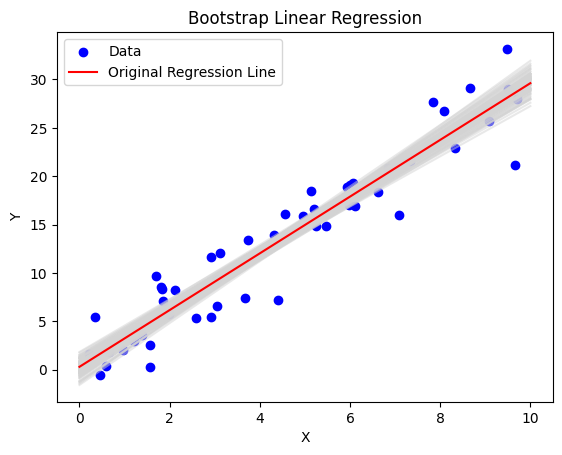

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
np.random.seed(42)
x = np.random.rand(50) * 10
y = 3 * x + np.random.normal(0, 3, size=x.shape[0])
x = x.reshape(-1, 1)
num_samples = 100
model = LinearRegression()
coefficients = []
intercepts = []
for _ in range(num_samples):
    indices = np.random.choice(range(x.shape[0]), size=x.shape[0], replace=True)
    x_sample, y_sample = x[indices], y[indices]
    model.fit(x_sample, y_sample)
    coefficients.append(model.coef_[0])
    intercepts.append(model.intercept_)

    plt.plot(np.linspace(0, 10, 100), model.predict(np.linspace(0, 10, 100).reshape(-1, 1)),
             color='lightgray', alpha=0.5)
plt.scatter(x, y, color='blue', label='Data')
model.fit(x, y)
plt.plot(np.linspace(0, 10, 100), model.predict(np.linspace(0, 10, 100).reshape(-1, 1)),
         color='red', label='Original Regression Line')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Bootstrap Linear Regression')
plt.legend()
plt.show()


LASSO REGRESSION

In [ ]:
model = Lasso(alpha=1.0)

n_iterations = 1000
mse_scores = []
rmse_scores = []
mae_scores = []

In [ ]:
for _ in range(n_iterations):
    indices = np.random.choice(len(x_train), size=len(x_train), replace=True)
    x_boot = x_train.iloc[indices]
    y_boot = y_train.iloc[indices]
    model.fit(x_boot, y_boot)
    y_pred = model.predict(x_test)

In [ ]:
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
mse_scores.append(mse)
rmse_scores.append(rmse)
mae_scores.append(mae)

In [ ]:
mse_ci = np.percentile(mse_scores, [2.5, 97.5])
rmse_ci = np.percentile(rmse_scores, [2.5, 97.5])
mae_ci = np.percentile(mae_scores, [2.5, 97.5])

In [ ]:
print(f"95% Confidence Interval for MSE: {mse_ci}")
print(f"95% Confidence Interval for RMSE: {rmse_ci}")
print(f"95% Confidence Interval for MAE: {mae_ci}")

95% Confidence Interval for MSE: [1.25052481e+08 1.25068888e+08]
95% Confidence Interval for RMSE: [11182.68667439 11183.42022299]
95% Confidence Interval for MAE: [1535.6878319 1632.0851001]


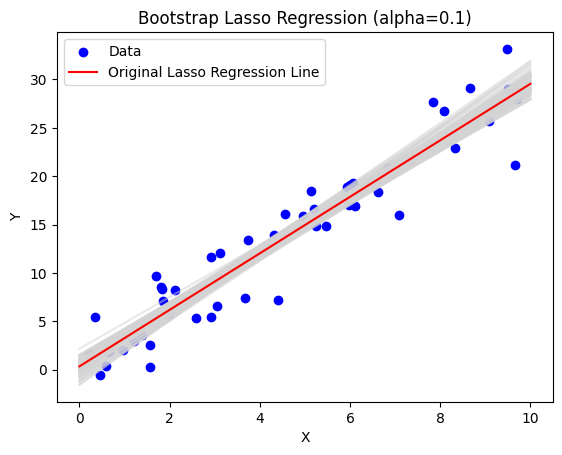

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import Lasso

np.random.seed(42)
x = np.random.rand(50) * 10
y = 3 * x + np.random.normal(0, 3, size=x.shape[0])
x = x.reshape(-1, 1)
num_samples = 100
alpha_value = 0.1
model = Lasso(alpha=alpha_value)
coefficients = []
intercepts = []
for _ in range(num_samples):
    indices = np.random.choice(range(x.shape[0]), size=x.shape[0], replace=True)
    x_sample, y_sample = x[indices], y[indices]
    model.fit(x_sample, y_sample)
    coefficients.append(model.coef_[0])
    intercepts.append(model.intercept_)
    plt.plot(np.linspace(0, 10, 100), model.predict(np.linspace(0, 10, 100).reshape(-1, 1)),
             color='lightgray', alpha=0.5)
plt.scatter(x, y, color='blue', label='Data')
model.fit(x, y)
plt.plot(np.linspace(0, 10, 100), model.predict(np.linspace(0, 10, 100).reshape(-1, 1)),
         color='red', label='Original Lasso Regression Line')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Bootstrap Lasso Regression (alpha={})'.format(alpha_value))
plt.legend()
plt.show()


Ridge Regression

In [ ]:
model = Ridge(alpha=1.0)
n_iterations = 1000
mse_scores = []
rmse_scores = []
mae_scores = []


In [ ]:
for _ in range(n_iterations):
    indices = np.random.choice(len(x_train), size=len(x_train), replace=True)
    x_boot = x_train.iloc[indices]
    y_boot = y_train.iloc[indices]
    model.fit(x_boot, y_boot)
    y_pred = model.predict(x_test)


In [ ]:
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test, y_pred)

    mse_scores.append(mse)
    rmse_scores.append(rmse)
    mae_scores.append(mae)

In [ ]:
mse_ci = np.percentile(mse_scores, [2.5, 97.5])
rmse_ci = np.percentile(rmse_scores, [2.5, 97.5])
mae_ci = np.percentile(mae_scores, [2.5, 97.5])

In [ ]:
print(f"95% Confidence Interval for MSE: {mse_ci}")
print(f"95% Confidence Interval for RMSE: {rmse_ci}")
print(f"95% Confidence Interval for MAE: {mae_ci}")

95% Confidence Interval for MSE: [1.25066655e+08 1.25066655e+08]
95% Confidence Interval for RMSE: [11183.32041138 11183.32041138]
95% Confidence Interval for MAE: [1530.77999464 1530.77999464]


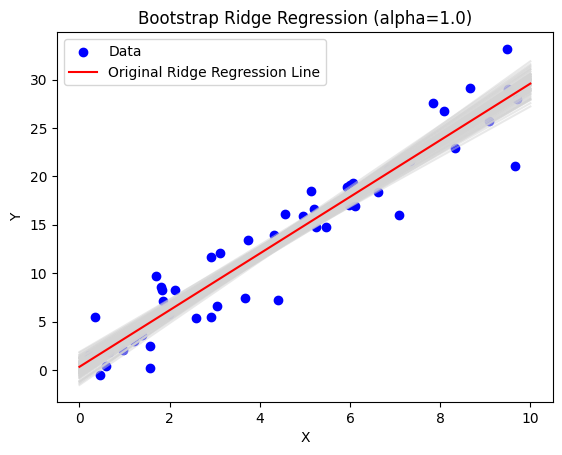

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge

np.random.seed(42)
x = np.random.rand(50) * 10
y = 3 * x + np.random.normal(0, 3, size=x.shape[0])
x = x.reshape(-1, 1)
num_samples = 100
alpha_value = 1.0
model = Ridge(alpha=alpha_value)
coefficients = []
intercepts = []
for _ in range(num_samples):
    indices = np.random.choice(range(x.shape[0]), size=x.shape[0], replace=True)
    x_sample, y_sample = x[indices], y[indices]
    model.fit(x_sample, y_sample)
    coefficients.append(model.coef_[0])
    intercepts.append(model.intercept_)
    plt.plot(np.linspace(0, 10, 100), model.predict(np.linspace(0, 10, 100).reshape(-1, 1)),
             color='lightgray', alpha=0.5)
plt.scatter(x, y, color='blue', label='Data')
model.fit(x, y)
plt.plot(np.linspace(0, 10, 100), model.predict(np.linspace(0, 10, 100).reshape(-1, 1)),
         color='red', label='Original Ridge Regression Line')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Bootstrap Ridge Regression (alpha={})'.format(alpha_value))
plt.legend()
plt.show()


K-NerestNeighbor(KNN)

In [ ]:
model = KNeighborsRegressor(n_neighbors=5)
n_iterations = 1000
mse_scores = []
rmse_scores = []
mae_scores = []


In [ ]:
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test, y_pred)

    mse_scores.append(mse)
    rmse_scores.append(rmse)
    mae_scores.append(mae)


In [ ]:
mse_ci = np.percentile(mse_scores, [2.5, 97.5])
rmse_ci = np.percentile(rmse_scores, [2.5, 97.5])
mae_ci = np.percentile(mae_scores, [2.5, 97.5])

In [ ]:
print(f"95% Confidence Interval for MSE: {mse_ci}")
print(f"95% Confidence Interval for RMSE: {rmse_ci}")
print(f"95% Confidence Interval for MAE: {mae_ci}")

95% Confidence Interval for MSE: [1.23320507e+08 1.23320507e+08]
95% Confidence Interval for RMSE: [11104.97666376 11104.97666376]
95% Confidence Interval for MAE: [1289.33501167 1289.33501167]


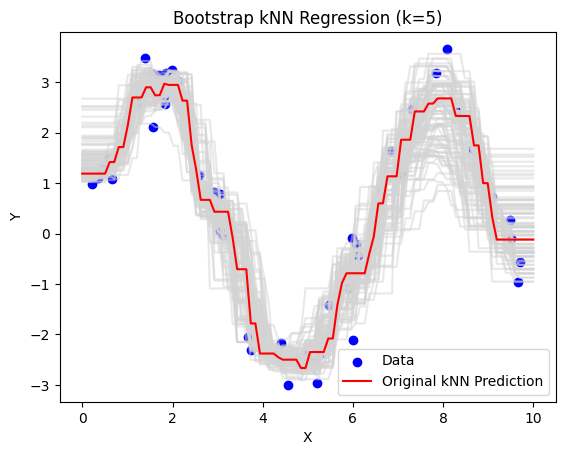

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsRegressor

np.random.seed(42)
x = np.sort(np.random.rand(50) * 10)
y = 3 * np.sin(x) + np.random.normal(0, 0.5, size=x.shape[0])
x = x.reshape(-1, 1)
num_samples = 100
k_value = 5
model = KNeighborsRegressor(n_neighbors=k_value)
x_grid = np.linspace(0, 10, 100).reshape(-1, 1)
for _ in range(num_samples):
    indices = np.random.choice(range(x.shape[0]), size=x.shape[0], replace=True)
    x_sample, y_sample = x[indices], y[indices]
    model.fit(x_sample, y_sample)
    y_pred = model.predict(x_grid)
    plt.plot(x_grid, y_pred, color='lightgray', alpha=0.5)
plt.scatter(x, y, color='blue', label='Data')
model.fit(x, y)
y_pred_full = model.predict(x_grid)
plt.plot(x_grid, y_pred_full, color='red', label='Original kNN Prediction')

plt.xlabel('X')
plt.ylabel('Y')
plt.title(f'Bootstrap kNN Regression (k={k_value})')
plt.legend()
plt.show()


SUPPORT VECTOR MECHINE(SVM)

In [ ]:
model = SVR(kernel='rbf')
n_iterations = 1000
mse_scores = []
rmse_scores = []
mae_scores = []

In [ ]:
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test, y_pred)

    mse_scores.append(mse)
    rmse_scores.append(rmse)
    mae_scores.append(mae)

In [ ]:
mse_ci = np.percentile(mse_scores, [2.5, 97.5])
rmse_ci = np.percentile(rmse_scores, [2.5, 97.5])
mae_ci = np.percentile(mae_scores, [2.5, 97.5])

In [ ]:
print(f"95% Confidence Interval for MSE: {mse_ci}")
print(f"95% Confidence Interval for RMSE: {rmse_ci}")
print(f"95% Confidence Interval for MAE: {mae_ci}")

95% Confidence Interval for MSE: [1.23320507e+08 1.23320507e+08]
95% Confidence Interval for RMSE: [11104.97666376 11104.97666376]
95% Confidence Interval for MAE: [1289.33501167 1289.33501167]


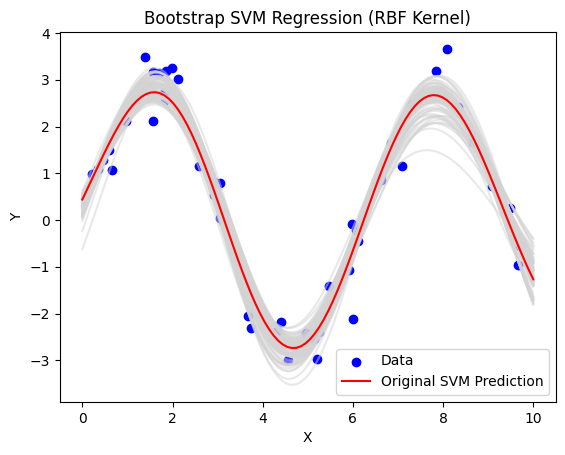

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVR

np.random.seed(42)
x = np.sort(np.random.rand(50) * 10)
y = 3 * np.sin(x) + np.random.normal(0, 0.5, size=x.shape[0])
x = x.reshape(-1, 1)
num_samples = 100l
model = SVR(kernel='rbf', C=10, epsilon=0.1)
x_grid = np.linspace(0, 10, 100).reshape(-1, 1)
for _ in range(num_samples):
    indices = np.random.choice(range(x.shape[0]), size=x.shape[0], replace=True)
    x_sample, y_sample = x[indices], y[indices]
    model.fit(x_sample, y_sample)
    y_pred = model.predict(x_grid)
    plt.plot(x_grid, y_pred, color='lightgray', alpha=0.5)
plt.scatter(x, y, color='blue', label='Data')
model.fit(x, y)
y_pred_full = model.predict(x_grid)
plt.plot(x_grid, y_pred_full, color='red', label='Original SVM Prediction')

plt.xlabel('X')
plt.ylabel('Y')
plt.title('Bootstrap SVM Regression (RBF Kernel)')
plt.legend()
plt.show()
